# Shapetastic Tutorial
We can draw 5 basic shapes: polygon, ellipse, rectangle, parallelogram, and star.

In [1]:
from shapes import draw_polygon, draw_ellipse, draw_rectangle, draw_parallelogram, draw_star

## Draw something on an axis
The coordinates are relative and always correspond to the center of the figure. Therefore, x=y=0.5 draws the shape in the center of the figure, independent of its dimensions.  
Additionally, parameters that relate to the size, width, heigth, radius, etc... are also always relative to the figsize.

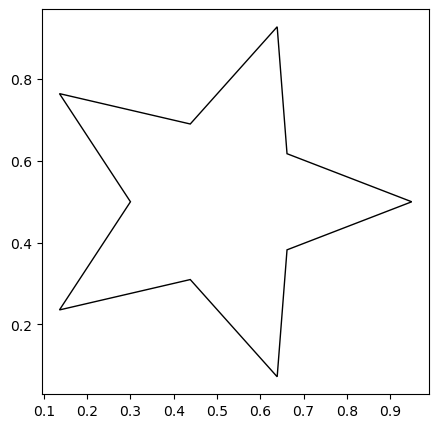

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
draw_star(ax, x=0.5, y=0.5, outer_radius=0.45, inner_radius=0.2, num_peaks=5, color="white", outline="black")

Changing the figsize keeps the star centered

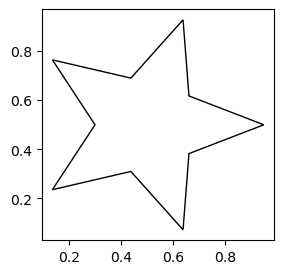

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))
draw_star(ax, x=0.5, y=0.5, outer_radius=0.45, inner_radius=0.2, num_peaks=5, color="white", outline="black")

Lets  move the shape outside the center

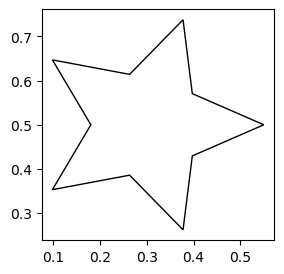

In [4]:
fig, ax = plt.subplots(figsize=(3, 3))
draw_star(ax, x=0.3, y=0.5, outer_radius=0.25, inner_radius=0.12, num_peaks=5, color="white", outline="black")

## Draw something and save it on a pixel accurate canvas
Useful in case you want to create a data set with specific resolution.

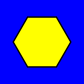

In [5]:
from plot_utils import create_canvas, save_canvas

background_color = "blue"
shape_color = "yellow"
outline_color = "black"

# Create a 64*64 pixel canvas
fig, ax = create_canvas(64, 64, background_color)

draw_polygon(ax, x=0.5, y=0.5, radius=0.45, n_points=6, color=shape_color, outline=outline_color)

file_name = "canvas.png"
save_canvas(fig, file_name)

You might want to have an outline that is more visible

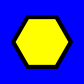

In [6]:
fig, ax = create_canvas(64, 64, background_color)
draw_polygon(ax, x=0.5, y=0.5, radius=0.45, n_points=6, color=shape_color, outline=outline_color, linewidth=3)

Colors can also be given in hex format

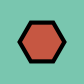

In [7]:
background_color = "#79c6af"
shape_color = "#c65742"

fig, ax = create_canvas(64, 64, background_color)

draw_polygon(ax, x=0.5, y=0.5, radius=0.35, n_points=6, color=shape_color, outline=outline_color, linewidth=3)

You might want to rotate the shape

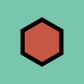

In [8]:
fig, ax = create_canvas(64, 64, background_color)

draw_polygon(ax, x=0.5, y=0.5, radius=0.35, n_points=6, color=shape_color, outline=outline_color, linewidth=3, rotation_angle=90)

The color of the outline can be interpolated between background and foreground colors

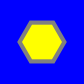

In [9]:
background_color = "blue"
shape_color = "yellow"

fig, ax = create_canvas(64, 64, background_color)

draw_polygon(ax, x=0.5, y=0.5, radius=0.35, n_points=6, color=shape_color, outline="interpolate", linewidth=3)

Or maybe you don't want an outline

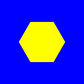

In [10]:
fig, ax = create_canvas(64, 64, background_color)

draw_polygon(ax, x=0.5, y=0.5, radius=0.35, n_points=6, color=shape_color, linewidth=0)

## More shapes

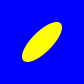

In [47]:
fig, ax = create_canvas(64, 64, background_color)

draw_ellipse(ax, x=0.5, y=0.5, width=0.8, height=0.3, color=shape_color, rotation_angle=45)

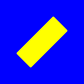

In [48]:
fig, ax = create_canvas(64, 64, background_color)

draw_rectangle(ax, x=0.5, y=0.5, width=0.8, height=0.3, color=shape_color, rotation_angle=45)

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.transforms import Affine2D

def draw_parallelogram(ax: plt.Axes, x: float, y: float, width: float, height: float, color: str, skew: float = 0, rotation_angle: float = 0, outline: str = None, linewidth: float = 1) -> None:
    """
    Draw a parallelogram with specified parameters.

    Parameters:
        ax (plt.Axes): The Axes object to draw the parallelogram on.
        x (float): x-coordinate of the center of the parallelogram.
        y (float): y-coordinate of the center of the parallelogram.
        width (float): Width of the parallelogram.
        height (float): Height of the parallelogram.
        color (str): Color of the parallelogram.
        skew (float, optional): Skew factor of the parallelogram in degrees. Defaults to 0.
        rotation_angle (float, optional): Rotation angle of the parallelogram in degrees. Defaults to 0.
        outline (str, optional): Color of the outline. Defaults to None.
        linewidth (float, optional): Width of the outline. If None, no outline will be drawn. Defaults to 1.

    Returns:
        None
    """
    # TODO: workaround to ensure proper correspondence to rotation_angle and skew
    tmp = width
    width = height
    height = tmp
    rotation_angle = (rotation_angle+90) % 360


    # Compensate for skew
    rotation_angle = rotation_angle+skew

    # Calculate translation for skew along x-axis
    tx = height * np.tan(np.deg2rad(skew))

    # Calculate vertices of the parallelogram at origin
    vertices = np.array([
        [- width / 2 - tx, - height / 2],
        [width / 2 - tx, - height / 2],
        [width / 2, height / 2],
        [- width / 2, height / 2]
    ])

    # Calculate center of the parallelogram at origin
    center_x = np.mean(vertices[:, 0])
    center_y = np.mean(vertices[:, 1])

    # Apply rotation around the center of the parallelogram
    rotation_transform = Affine2D().translate(-center_x, -center_y).rotate_deg(rotation_angle).translate(x, y)
    transformed_vertices = rotation_transform.transform(vertices)

    # Create parallelogram
    parallelogram = Polygon(transformed_vertices, edgecolor=color, facecolor=color, linewidth=linewidth)

    # Add parallelogram to the axes
    ax.add_patch(parallelogram)

    # Compute interpolated color value for outline
    if outline == "interpolate":
        background_color = ax.get_figure().get_facecolor()
        outline = interpolate_color(background_color, color)
        
    # Draw outline
    if outline is not None and linewidth is not None:
        parallelogram.set_linewidth(linewidth)
        parallelogram.set_edgecolor(outline)

    plt.plot()

As long as you don't provide a skew, the result of draw_parallelogram is equivalent to draw_rectangle.

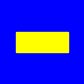

In [106]:
fig, ax = create_canvas(64, 64, background_color)

draw_parallelogram(ax, x=0.5, y=0.5, width=0.7, height=0.3, color=shape_color)

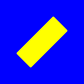

In [107]:
fig, ax = create_canvas(64, 64, background_color)

draw_parallelogram(ax, x=0.5, y=0.5, width=0.7, height=0.3, color=shape_color, rotation_angle=45)

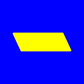

In [120]:
fig, ax = create_canvas(64, 64, background_color)

draw_parallelogram(ax, x=0.5, y=0.5, width=0.7, height=0.3, color=shape_color, skew=25)

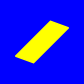

In [121]:
fig, ax = create_canvas(64, 64, background_color)

draw_parallelogram(ax, x=0.5, y=0.5, width=0.7, height=0.3, color=shape_color, skew=25, rotation_angle=45)

## Combining several shapes

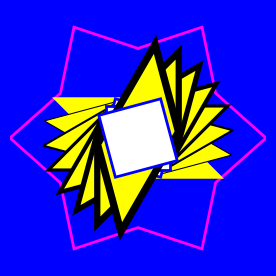

In [122]:
fig, ax = create_canvas(256, 256, background_color)

draw_star(ax, x=0.5, y=0.5, outer_radius=0.5, inner_radius=0.35, num_peaks=6, color="blue", outline="magenta", linewidth=2)

for i in range(0, 120, 15):
    draw_parallelogram(ax, 0.5, 0.5, 0.25, 0.45, color="yellow", skew=45, rotation_angle=i, outline="black", linewidth=i*0.05)
    draw_rectangle(ax, 0.5, 0.5, 0.25, 0.25, color="white", rotation_angle=i, outline="blue", linewidth=2)
